In [1]:
# Numpy
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
mat = np.zeros((3, 3)) 

print(arr.shape)        
print(arr.mean())       
print(arr + 10)       
print(arr.reshape(5,1))

(5,)
3.0
[11 12 13 14 15]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [2]:
# Pandas
import pandas as pd

data = {'Name': ['Anna', 'Bob'], 'Age': [25, 30]}
df = pd.DataFrame(data)

print(df.head())        
print(df.describe())    
print(df['Age'].mean()) 

# df = pd.read_csv('file.csv')
# df.to_csv('new_file.csv', index=False)

   Name  Age
0  Anna   25
1   Bob   30
             Age
count   2.000000
mean   27.500000
std     3.535534
min    25.000000
25%    26.250000
50%    27.500000
75%    28.750000
max    30.000000
27.5


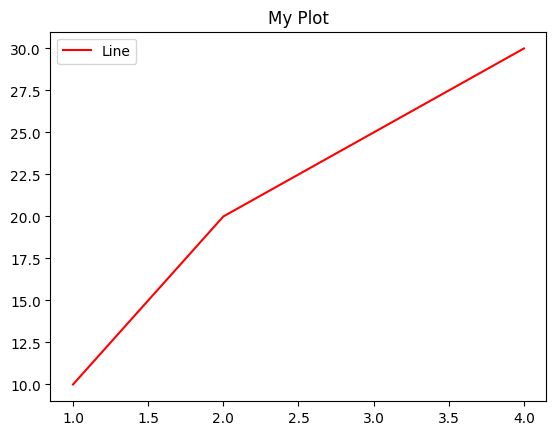

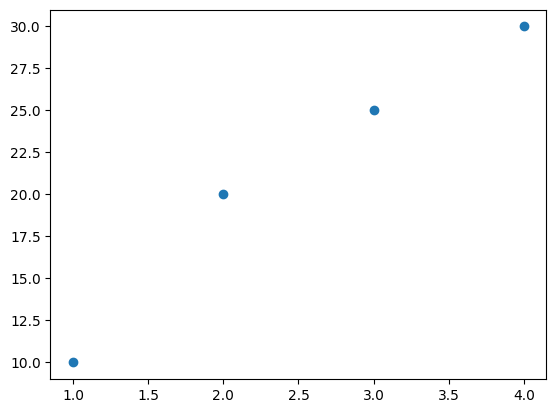

In [3]:
# Matplotlib
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# 1. Line Plot
plt.figure()
plt.plot(x, y, color='red', label='Line')
plt.title("My Plot")
plt.legend()
plt.show()

# 2. Scatter Plot
plt.scatter(x, y)
plt.show()

In [4]:
# Scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load & Split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Model & Fit
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 3. Predict & Eval
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9333333333333333


In [5]:
# Tensorflow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Dummy Data
import numpy as np
X = np.random.random((100, 20)) 
y = np.random.randint(2, size=(100, 1)) 

# 2. Build Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')                   
])

# 3. Compile & Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, batch_size=10)
model.summary()

Epoch 1/5


c:\Users\Abhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5400 - loss: 0.7121  
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5400 - loss: 0.6989 
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5700 - loss: 0.6948 
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5700 - loss: 0.6923 
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5700 - loss: 0.6901 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117 (8.27 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,412 (5.52 KB)

In [6]:
# Pytorch
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Data (Tensors)
X = torch.randn(10, 5)  
y = torch.randn(10, 1) 

# 2. Model
model = nn.Linear(5, 1) 

# 3. Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Training Step
optimizer.zero_grad()   
output = model(X)       
loss = criterion(output, y) 
loss.backward()        
optimizer.step()      

print("Loss:", loss.item())

Loss: 0.8592545390129089


In [7]:
# DEAP
from deap import base, creator, tools
import random

# 1. Setup Fitness (Weights: 1.0 for Max, -1.0 for Min)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 2. Toolbox (Register functions)
toolbox = base.Toolbox()
# Attribute generator (random integers)
toolbox.register("attr_int", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 3. Test 
pop = toolbox.population(n=5)
print(pop[0]) 

[1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
